<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Kaggle_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Data Analysis** <br> Basic Analysis of the Covid19 dataset <br> Findings<br> 1. There is a significant country by country and territory(province or state) by territory variability.<br> 2. It doesn't seem practical to fit a single predictions model using this dataset <br>3. The epidemic development scenarios seems to be bounded by 2 border cases with Hubei province of China and Italy representing upper bound and Japan representing the lower bound. Singapore and Hong Kong (and some China provinces) somewhat close to Japan's pattern yet those geogrpahies are much smaller in scale<br>4. NY and CA seems to follow Italy pattern yet it is to early to tell whether they will continue on the same trajectory 

In [0]:
# Use seaborn for the correlation heatmap
!pip install seaborn

In [0]:
import warnings
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import math
# Time related libraries
import time

In [0]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving covid19-global-forecasting-week-1.zip to covid19-global-forecasting-week-1.zip


In [0]:
#Unzipping if needed
!unzip covid19-global-forecasting-week-1.zip

Archive:  covid19-global-forecasting-week-1.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [0]:
#read file & check the upload
df = pd.read_csv('train.csv')
df_filtered = df.loc[df['ConfirmedCases'] != 0]
df_filtered.head(10)

In [0]:
data_shape = df.shape
print(data_shape)

(16188, 8)


In [0]:
#data cleaning & exploration
unknown_count = df.isna().sum().drop_duplicates()
unknown_count[unknown_count>0]

Province/State    8778
dtype: int64

In [0]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia

In [0]:
df_US = df[df['Country/Region']=='US']
df_US.head(30)

In [0]:
df_US_filtered = df_US.loc[df['ConfirmedCases'] != 0]
df_US_filtered.head(30)

In [0]:
df_China = df[df['Country/Region']=='China']
df_China.head(30)

In [0]:
df_China['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object)

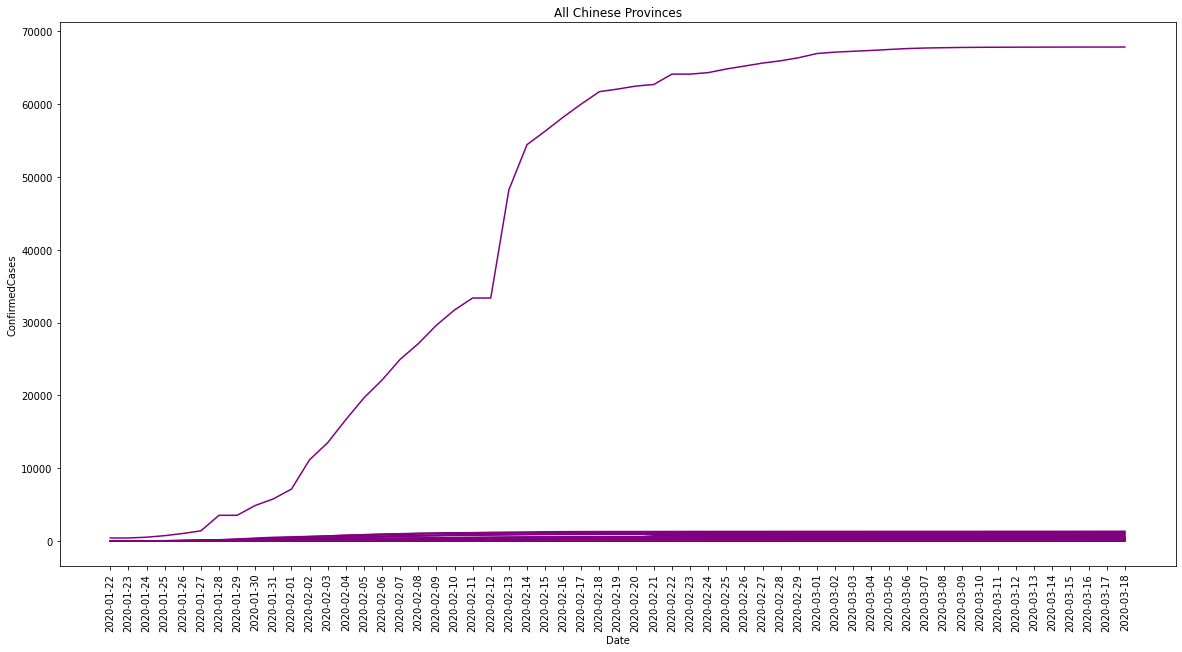

In [81]:
#China Data - All Provinces
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
sources = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']
for source in sources:
  # Add x-axis and y-axis
  ax.plot(df.loc[df['Province/State'] == source,'Date'],
          df.loc[df['Province/State'] == source, 'ConfirmedCases'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="All Chinese Provinces")
plt.xticks(rotation=90)
#plt.legend(loc='upper left')
plt.show()

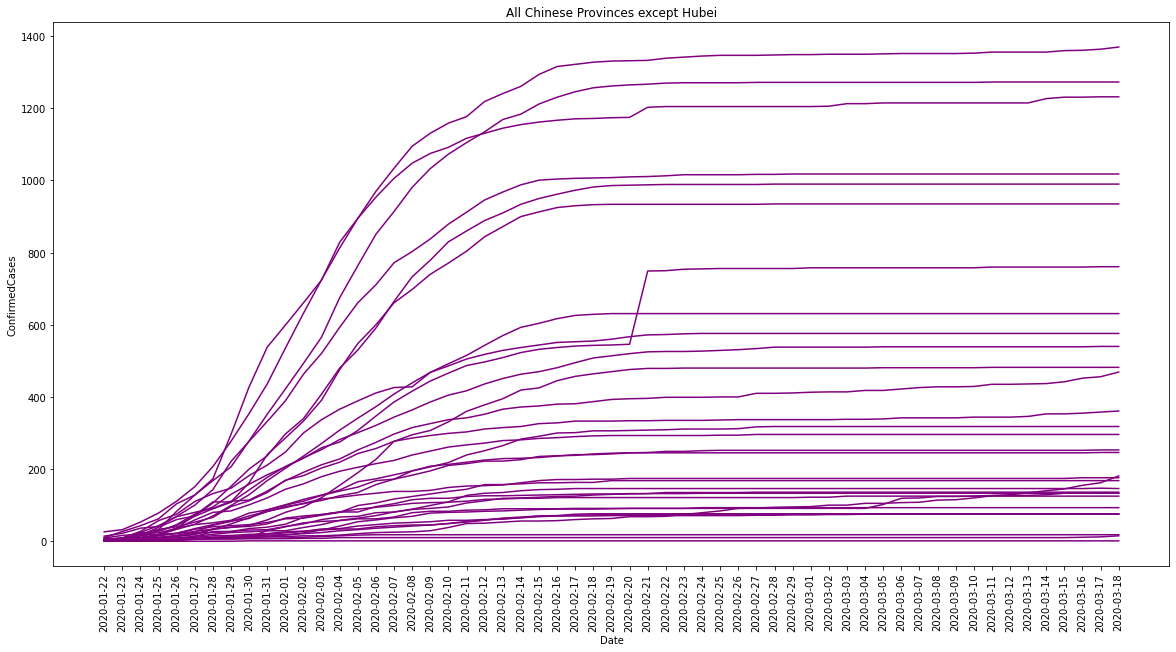

In [82]:
# China Without Hubei Province
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
sources = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']
for source in sources:
  # Add x-axis and y-axis
  ax.plot(df.loc[df['Province/State'] == source,'Date'],
          df.loc[df['Province/State'] == source, 'ConfirmedCases'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="All Chinese Provinces except Hubei")
plt.xticks(rotation=90)
#plt.legend(loc='upper left')
plt.show()

In [0]:
df_Hubei = df[df['Province/State']=='Hubei']
df_Hubei.head(30)

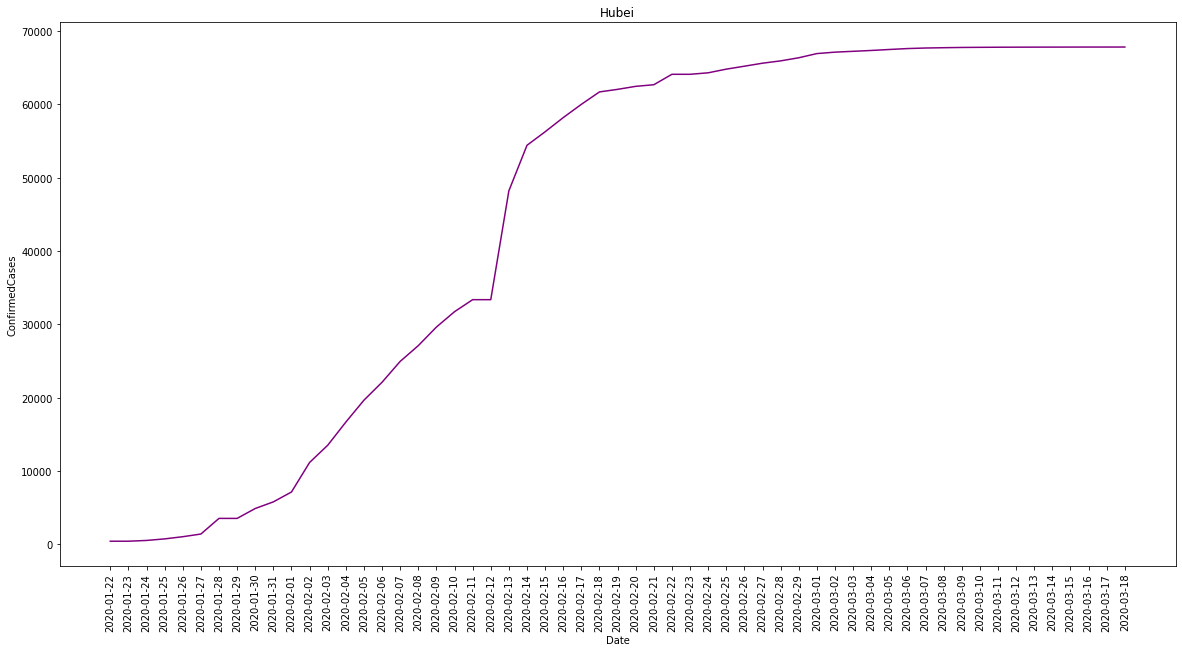

In [83]:
# Hubei Province
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_Hubei['Date'],
        df_Hubei['ConfirmedCases'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Hubei")
plt.xticks(rotation=90)
plt.show()

In [0]:
df_Italy = df[df['Country/Region']=='Italy']
df_Italy.head(30)

In [0]:
# Max Slope for Hubei and Italy. Both are vertical yet Hubei is the most vertical of them all
start_max_Italy = df_Italy.loc[df_Italy['Date'] == '2020-03-12', 'ConfirmedCases'].values[0]
finish_max_Italy = df_Italy.loc[df_Italy['Date'] == '2020-03-18', 'ConfirmedCases'].values[0]
slope_max_italy = (finish_max_Italy-start_max_Italy)/6
print(slope_max_italy)
start_max_Hubei = df_Hubei.loc[df_Hubei['Date'] == '2020-02-12', 'ConfirmedCases'].values[0]
finish_max_Hubei = df_Hubei.loc[df_Hubei['Date'] == '2020-02-15', 'ConfirmedCases'].values[0]
slope_max_Hubei = (finish_max_Hubei-start_max_Hubei)/2
print(slope_max_Hubei)

3875.1666666666665
11441.5


In [0]:
df_Korea_South = df[df['Country/Region']=='Korea, South']
df_Korea_South.head(30)

In [0]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))

# Add x-axis and y-axis
ax.plot(df_Korea_South['Date'],
        df_Korea_South['ConfirmedCases'],label = 'South Korea',
        color='purple')
ax.plot(df_Korea_South['Date'],
        df_Italy['ConfirmedCases'],label = 'Italy',
        color='red')


# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases", 
       title="Italy vs South Korea")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [0]:
df_Japan = df[df['Country/Region']=='Japan']
df_Japan.head(30)

In [0]:
df_NY = df[df['Province/State']=='New York']
df_NY.head(30)

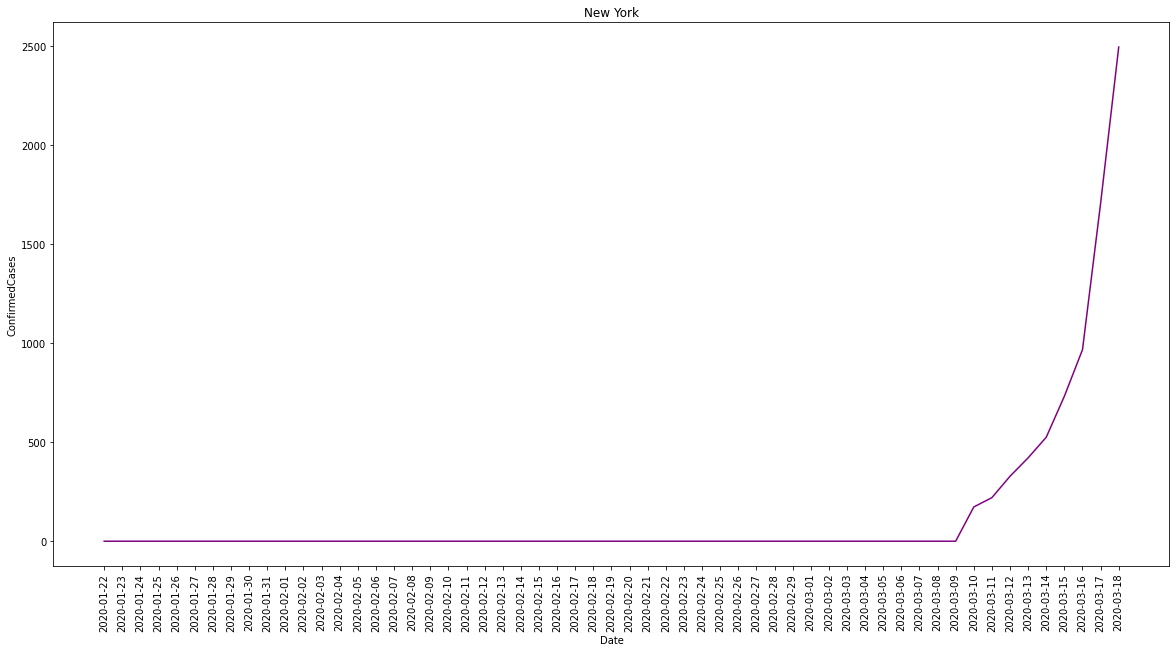

In [65]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_NY['Date'],
        df_NY['ConfirmedCases'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="New York")
plt.xticks(rotation=90)
plt.show()

In [95]:
start_max_NY = df_NY.loc[df_NY['Date'] == '2020-03-09', 'ConfirmedCases'].values[0]
finish_max_NY = df_NY.loc[df_NY['Date'] == '2020-03-18', 'ConfirmedCases'].values[0]
slope_max_NY = (finish_max_NY-start_max_NY)/9

3.141592653589793

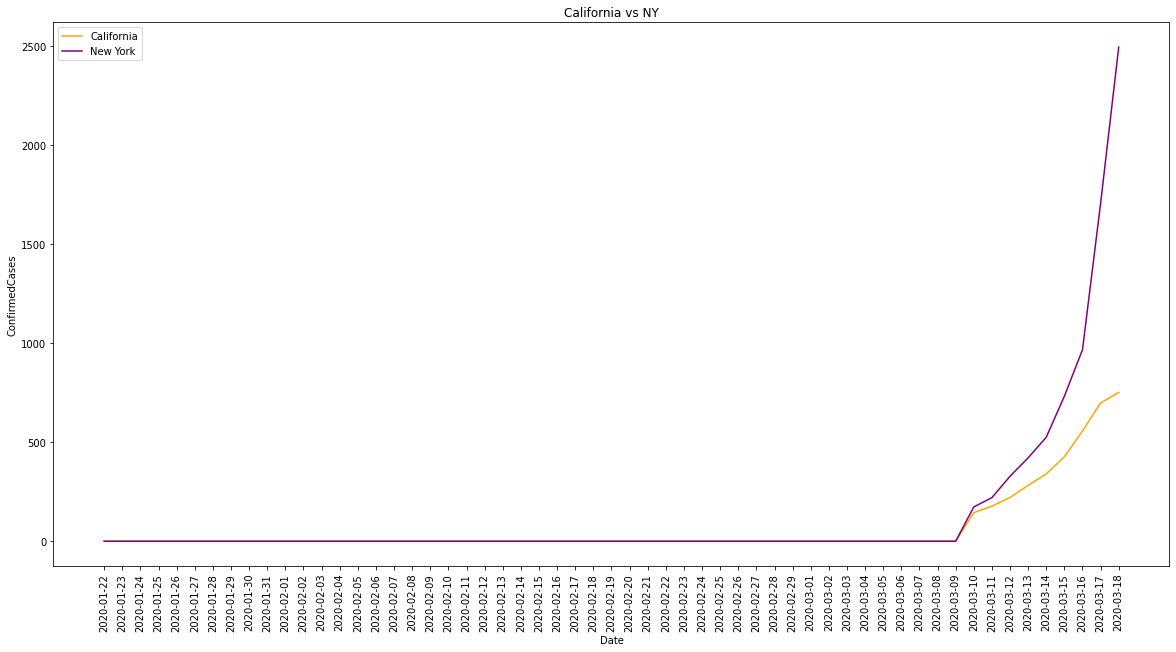

In [80]:
# California and NY
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
sources = [('California','orange'),('New York','purple')]
for source in sources:
  # Add x-axis and y-axis
  ax.plot(df.loc[df['Province/State'] == source[0],'Date'],
          df.loc[df['Province/State'] == source[0], 'ConfirmedCases'],
          label = source[0],
          color=source[1])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="California vs NY")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

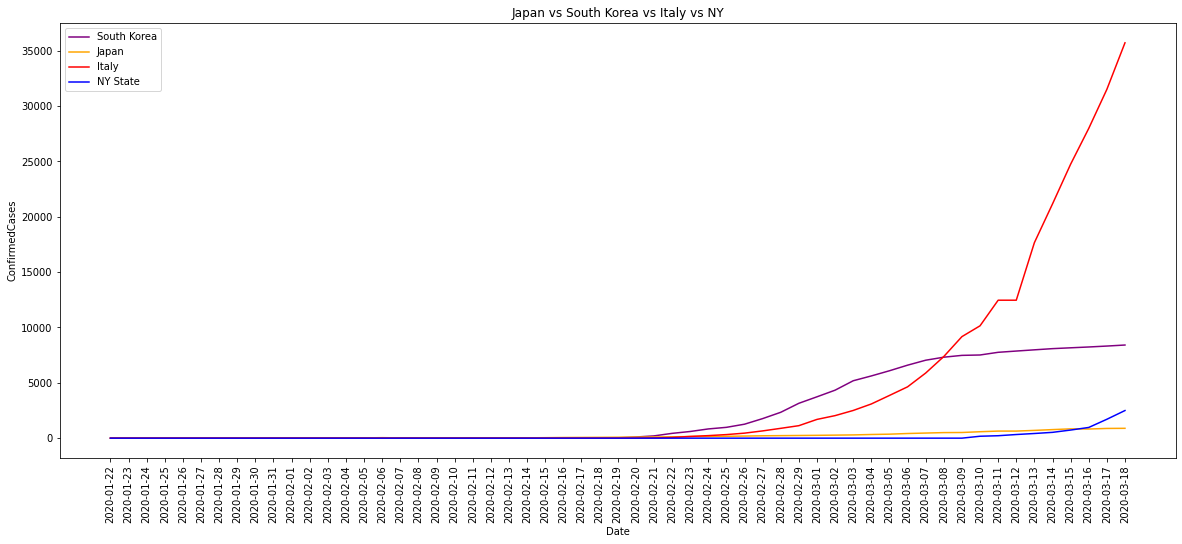

In [68]:
# Japan vs South Korea vs Italy vs NY
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))

# Add x-axis and y-axis
ax.plot(df_Korea_South['Date'],
        df_Korea_South['ConfirmedCases'],label = 'South Korea',
        color='purple')
ax.plot(df_Korea_South['Date'],
        df_Japan['ConfirmedCases'],label = 'Japan',
        color='orange')
ax.plot(df_Korea_South['Date'],
        df_Italy['ConfirmedCases'],label = 'Italy',
        color='red')
ax.plot(df_Korea_South['Date'],
        df_NY['ConfirmedCases'],label = 'NY State',
        color='blue')
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases", 
       title="Japan vs South Korea vs Italy vs NY")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [0]:
# Confirmed VS Deaths Japan
# Confirmed vs Deaths South Korea
# Cofirmed vs Deaths Hubei
# Confirmed vs Deaths Italy